In [24]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('5_writers.csv')
# create a dataframe to compare the first writer and other writers by setting first writer 1 and other writers 0
df_first = df.copy()
df_first['first_writer'] = df_first['writer_id'].replace([0, 1, 2, 3, 4], [1, 0, 0, 0, 0]).astype(int)

In [26]:
# use Lasso to do feature selection
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1).fit(df.drop(["writer_id", "label", "char_type"], axis=1), df['writer_id'])
feature_selected = np.nonzero(lasso.coef_)[0]

In [27]:
# create formula for the model
column_name = list(df.drop(["writer_id", "label", "char_type"], axis=1))
size = len(feature_selected)
column = 'first_writer ~ '
for i in range(size - 1):
    column += column_name[feature_selected[i]] + ' + '
column += column_name[feature_selected[size - 1]]

In [28]:
# use logistic regression
formula = column
lr_model = smf.glm(formula = formula, 
             data = df_first, family = sm.families.Binomial()).fit()
prediction = lr_model.predict()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           first_writer   No. Observations:                 1911
Model:                            GLM   Df Residuals:                     1893
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -844.32
Date:                Sun, 17 Mar 2019   Deviance:                       1688.6
Time:                        15:32:53   Pearson chi2:                 1.84e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4731      0.085     -5.558      0.000      -0.640      -0.306
pixel_4936     -0.8955      0.386     -2.320      0.020      -1.652      -0.139
pixel_5319      0.1920      0.409      0.469      0.639      -0.610       0.994
pixel_5448     -0.1531      0.453     -0.338      0.735      -1.041       0.735
pixel_5577     -0.9471      0.322     -2.937      0.003      -1.579      -0.315
pixel_7376     -0.4547      0.293     -1.549      0.121      -1.030       0.121
pixel_7503     -0.1284      0.281     -0.457      0.648      -0.679       0.423
pixel_7602     -0.1462      0.298     -0.491      0.623      -0.729       0.437
pixel_7730     -0.0828      0.399     -0.207      0.836      -0.865       0.700
pixel_7858      0.2236      0.297      0.753      0.452      -0.359       0.806
pixel_8013     -0.3010      0.261     -1.155      0.248      -0.812       0.210
pixel_8142     -0.6084      0.291     -2.087      0.037      -1.180      -0.037
pixel_8495     -0.6457      0.202     -3.194      0.001      -1.042      -0.250
pixel_10172    -0.4167      0.211     -1.971      0.049      -0.831      -0.002
pixel_10174    -0.5745      0.259     -2.220      0.026      -1.082      -0.067
pixel_10177    -0.3063      0.215     -1.426      0.154      -0.727       0.115
pixel_10419    -0.0901      0.190     -0.474      0.636      -0.463       0.283
pixel_10929    -0.2160      0.269     -0.802      0.423      -0.744       0.312
===============================================================================
"""

In [29]:
# using a threshold of .5 to predict a binary outcome 
default_pred = []
for i in range(len(prediction)):
    if (prediction[i] <= 0.5):
        default_pred.append(0)
    else:
        default_pred.append(1)
df_first['predic'] = default_pred

In [30]:
# accuracy score for comparing first writer to other writers
(df_first.first_writer == df_first.predic).sum() / df_first.shape[0]

0.8001046572475143

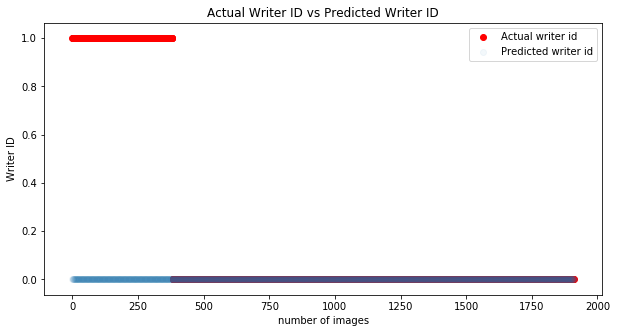

In [53]:
x = np.arange(0, 1911, 1)
plt.figure(figsize = (10,5))
plt.scatter(x, df_first['first_writer'], label = 'Actual writer id', color = 'red')
plt.scatter(x, df_first['predic'], alpha = 0.05, label = 'Predicted writer id')
plt.legend()
plt.title('Actual Writer ID vs Predicted Writer ID')
plt.xlabel('number of images')
plt.ylabel('Writer ID')
plt.show()

In [31]:
# create a dataframe to compare the second writer and other writers by setting the second writer 1 and other writers 0
df_second = df.copy()
df_second['second_writer'] = df_second['writer_id'].replace([0, 1, 2, 3, 4], [0, 1, 0, 0, 0]).astype(int)

In [32]:
# create formula for the model
columns = 'second_writer ~ '
for i in range(size - 1):
    columns += column_name[feature_selected[i]] + ' + '
columns += column_name[feature_selected[size - 1]]

In [33]:
# use logistic regression
formula_second = columns
lr_model_2 = smf.glm(formula = formula_second, 
             data = df_second, family = sm.families.Binomial()).fit()
prediction_2 = lr_model_2.predict()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          second_writer   No. Observations:                 1911
Model:                            GLM   Df Residuals:                     1893
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -839.86
Date:                Sun, 17 Mar 2019   Deviance:                       1679.7
Time:                        15:32:53   Pearson chi2:                 3.42e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3452      0.084     -4.085      0.000      -0.511      -0.180
pixel_4936     -1.6195      0.516     -3.136      0.002      -2.632      -0.607
pixel_5319     -0.1354      0.440     -0.308      0.758      -0.997       0.727
pixel_5448     -0.1049      0.471     -0.223      0.824      -1.028       0.819
pixel_5577     -0.5851      0.318     -1.842      0.066      -1.208       0.038
pixel_7376     -0.3423      0.309     -1.107      0.268      -0.948       0.264
pixel_7503     -0.4285      0.295     -1.455      0.146      -1.006       0.149
pixel_7602     -0.3522      0.316     -1.115      0.265      -0.972       0.267
pixel_7730      0.0303      0.427      0.071      0.943      -0.806       0.867
pixel_7858     -0.6113      0.322     -1.901      0.057      -1.242       0.019
pixel_8013     -0.1759      0.255     -0.690      0.490      -0.675       0.324
pixel_8142     -0.6974      0.297     -2.350      0.019      -1.279      -0.116
pixel_8495     -0.4345      0.214     -2.032      0.042      -0.854      -0.015
pixel_10172    -0.2382      0.202     -1.180      0.238      -0.634       0.157
pixel_10174     0.5766      0.240      2.401      0.016       0.106       1.047
pixel_10177    -0.5753      0.198     -2.902      0.004      -0.964      -0.187
pixel_10419    -0.5543      0.200     -2.768      0.006      -0.947      -0.162
pixel_10929    -1.0643      0.365     -2.920      0.004      -1.779      -0.350
===============================================================================
"""

In [34]:
# using a threshold of .5 to predict a binary outcome 
pred = []
for i in range(len(prediction_2)):
    if (prediction_2[i] <= 0.5):
        pred.append(0)
    else:
        pred.append(1)
df_second['predic'] = pred

In [35]:
# accuracy score for comparing the second writer to other writers
(df_second.second_writer == df_second.predic).sum() / df_second.shape[0]

0.7807430664573521

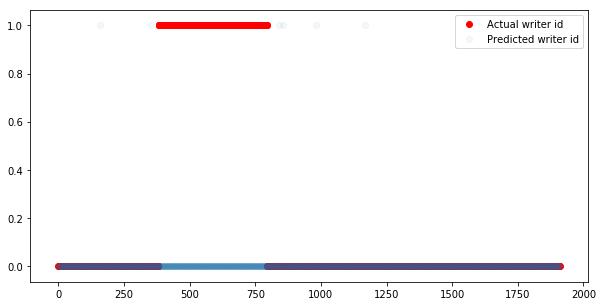

In [52]:
x = np.arange(0, 1911, 1)
plt.figure(figsize = (10,5))
plt.scatter(x, df_second['second_writer'], label = 'Actual writer id', color = 'red')
plt.scatter(x, df_second['predic'], alpha = 0.05, label = 'Predicted writer id')
plt.legend()
plt.show()